In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

Enter the folder path that contains the T1CE and T2 files: C:\Users\User\Documents\33


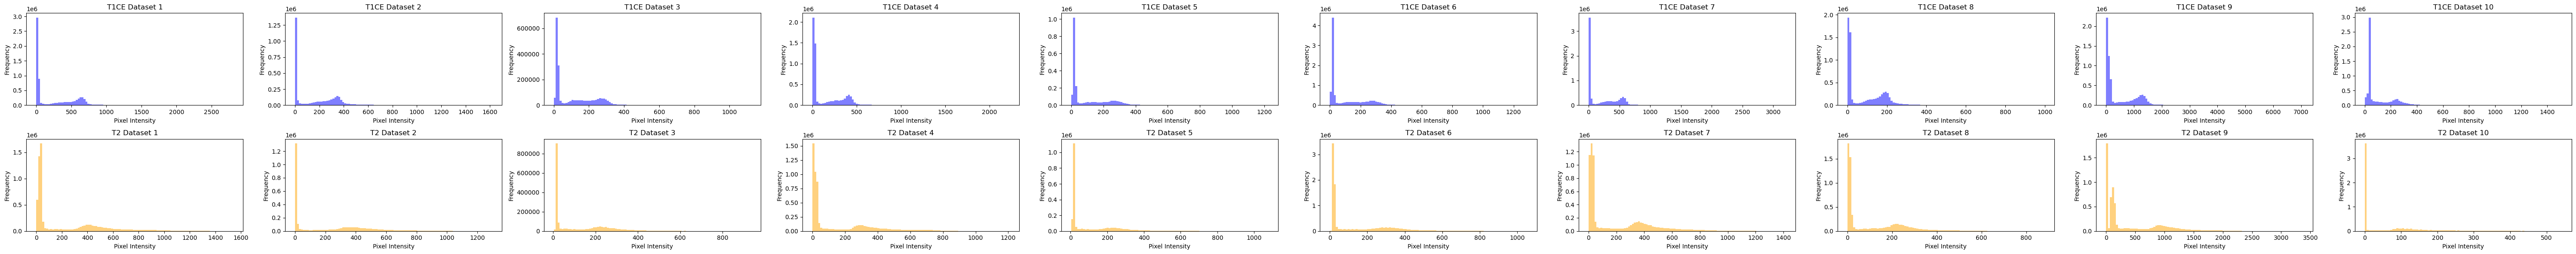

In [8]:
def load_individual_data(folder_path):
    
    t1ce_files = []
    t2_files = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith('.nii') or filename.endswith('.nii.gz'):
            if 't1ce' in filename.lower():
                t1ce_files.append(os.path.join(folder_path, filename))
            elif 't2' in filename.lower():
                t2_files.append(os.path.join(folder_path, filename))
                    
    t1ce_files.sort()
    t2_files.sort()
    
    t1ce_data = [nib.load(file).get_fdata() for file in t1ce_files]
    t2_data = [nib.load(file).get_fdata() for file in t2_files]
    
    return t1ce_data, t2_data

def plot_individual_histograms(t1ce_data, t2_data):
    num_datasets = len(t1ce_data)
    
    plt.figure(figsize=(6*num_datasets, 6))
    
    for i in range(num_datasets):
        # Plot T1CE
        plt.subplot(2, num_datasets, i+1)
        plt.hist(t1ce_data[i].flatten(), bins=100, color='blue', alpha=0.5)
        plt.title(f'T1CE Dataset {i+1}')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        
        # Plot T2
        plt.subplot(2, num_datasets, num_datasets+i+1)
        plt.hist(t2_data[i].flatten(), bins=100, color='orange', alpha=0.5)
        plt.title(f'T2 Dataset {i+1}')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

folder_path = input('Enter the folder path that contains the T1CE and T2 files: ')
t1ce_data, t2_data = load_individual_data(folder_path)
plot_individual_histograms(t1ce_data, t2_data)

Enter the folder path that contains the T1CE, T2 and mask files: C:\Users\User\Documents\33


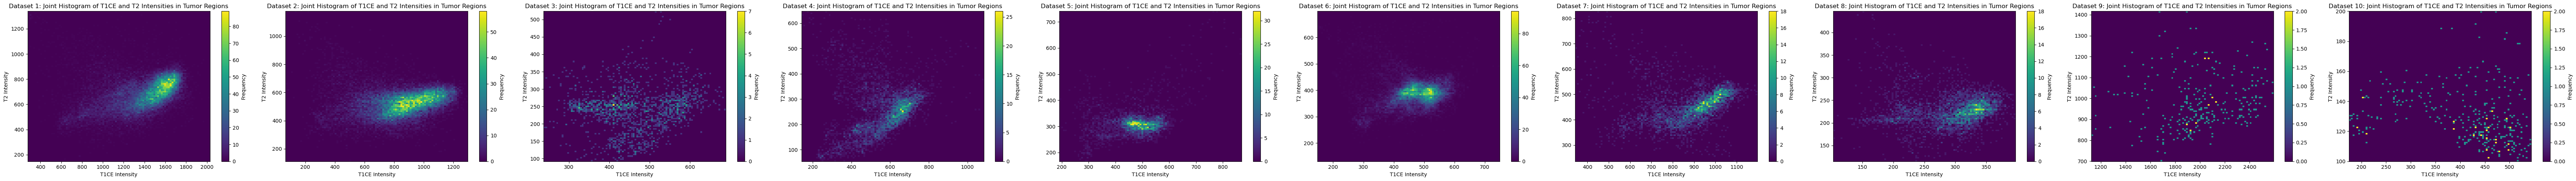

In [4]:
def load_joint_data(folder_path):
    t1ce_files = []
    t2_files = []
    mask_files = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith('.nii') or filename.endswith('.nii.gz'):
            if 't1ce' in filename.lower():
                t1ce_files.append(os.path.join(folder_path, filename))
            elif 't2' in filename.lower():
                t2_files.append(os.path.join(folder_path, filename))
            elif 'mask' in filename.lower():
                mask_files.append(os.path.join(folder_path, filename))
                    
    t1ce_files.sort()
    t2_files.sort()
    mask_files.sort()
    
    data = []
    for t1ce_file, t2_file, mask_file in zip(t1ce_files, t2_files, mask_files):
        t1ce_image = nib.load(t1ce_file).get_fdata()
        t2_image = nib.load(t2_file).get_fdata()
        mask_image = nib.load(mask_file).get_fdata().astype(bool)
        data.append((t1ce_image, t2_image, mask_image))
    
    return data

def plot_joint_histograms(datasets):
    num_datasets = len(datasets)
    
    plt.figure(figsize=(7*num_datasets, 5))
    
    for i, (t1ce_image, t2_image, mask_image) in enumerate(datasets, start=1):
        t1ce_tumor = t1ce_image[mask_image]
        t2_tumor = t2_image[mask_image]

        plt.subplot(1, num_datasets, i)
        plt.hist2d(t1ce_tumor.flatten(), t2_tumor.flatten(), bins=100, cmap='viridis')
        plt.colorbar(label='Frequency')
        plt.xlabel('T1CE Intensity')
        plt.ylabel('T2 Intensity')
        plt.title(f'Dataset {i}: Joint Histogram of T1CE and T2 Intensities in Tumor Regions')
    
    plt.tight_layout()
    plt.show()
    
folder_path = input('Enter the folder path that contains the T1CE, T2 and mask files: ')
joint_data = load_joint_data(folder_path)
plot_joint_histograms(joint_data)